In [15]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('../DecisionTree_AMZN.csv', delimiter = ',', index_col = 'date', parse_dates = True)
data.head()

,open,low,high,volume,close,Name
date,,,,,,
2014-01-02,398.80,394.02,399.36,2137800.0,397.97,AMZN
2014-01-03,398.29,396.22,402.71,2210200.0,396.44,AMZN
2014-01-06,395.85,388.42,397.00,3170600.0,393.63,AMZN
2014-01-07,395.04,394.29,398.47,1916000.0,398.03,AMZN
2014-01-08,398.47,396.04,403.00,2316500.0,401.92,AMZN


In [20]:
# Features construction 
data['Open-Close'] = (data.open - data.close)/data.open
data['High-Low'] = (data.high - data.low)/data.low
data['percent_change'] = data['close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)
# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(data['close'].shift(-1) > data['close'], 1, -1)

In [21]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

786

In [22]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(786, 4) (263, 4)
(786,) (263,)


In [23]:
clf = RandomForestClassifier(random_state=5)

In [24]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

In [25]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  50.57034220532319


In [26]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.44      0.60      0.51       113
           1       0.59      0.43      0.50       150

    accuracy                           0.51       263
   macro avg       0.52      0.52      0.51       263
weighted avg       0.53      0.51      0.50       263



In [27]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

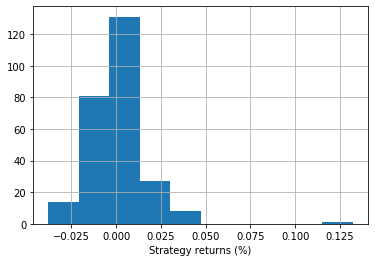

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

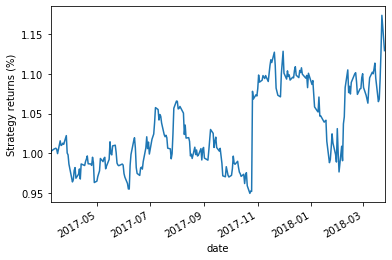

In [29]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()